# <center> Quasi Newton Method : NLP Assignment
## <center> Rank 1 Correction Method

---

### <center> Name - Ranjan Sarkar | Roll - 21MA40022

***
$$
    f(x,y) = 4x^2 + 2xy + 3y^2 + x - y
$$

Initial Point = $\begin{pmatrix}1 \\ 1 \end{pmatrix}$ ,  $B^0 = \begin{pmatrix}1 & 0 \\ 0 & 1\end{pmatrix}$

Minimizing the function by using Quasi Newton Method `(Rank 1 Correction)`
***

Importing Libraries

In [1]:
from sympy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Defining the Function

4*x**2 + 2*x*y + x + 3*y**2 - y

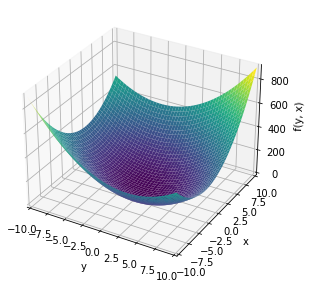

In [2]:
x, y, a, d, g = symbols('x y alpha delta gamma')
var = Matrix([x, y])    # independent variable in a Matrix form

f = lambda X: (4*x**2 + 2*x*y + 3*y**2 + x - y).subs(zip(var, X))
display(f(var))

plotting.plot3d(f(var))
plt.show()

Gradient Vector

In [3]:
grad = lambda X: f(var).diff(var).subs(zip(var, X))
grad(var)

Matrix([
[8*x + 2*y + 1],
[2*x + 6*y - 1]])

Setting up the Initial Values

In [4]:
# initial values
point = Matrix([1, 1])    # initial X = X0
B = Matrix(np.eye(2))     # initial Matrix = B0
eps = 0.001

# In the following arrays we will collect the data in each iteration
set_of_point = set_of_grad = set_dir_vects = np.array(point.n(7))
set_of_B = np.array([B])
set_of_alpha = []
f_values = [f(point).n(7)]

### Main Calculation

In [5]:
while grad(point).norm() >= eps:
    
    dir_vector = - B * grad(point)
    new_point = point + a * dir_vector

    region = solve(f(new_point).simplify() < f(point))

    # finding the alpha
    alpha = 1
    while not(alpha in region.as_set()):
        alpha -= 0.01

    new_point = new_point.subs(a, alpha)

    # getting delta, gamma
    d = new_point - point
    g = grad(new_point) - grad(point)

    M = (d - B * g)
    new_B = B + (M * M.T) / (M.T * g)[0]
    
    # saving the data to the lists
    set_of_point  = np.append (set_of_point , np.array(new_point.n(7)), axis = 1)
    set_dir_vects = np.append (set_dir_vects, np.array(dir_vector.n(7)), axis = 1)
    set_of_alpha  = np.append (set_of_alpha , np.array(alpha))
    set_of_grad   = np.append (set_of_grad, np.array((grad(point)).n(7)), axis = 1)
    set_of_B      = np.append (set_of_B, np.array([new_B.n(7)]), axis = 0)
    f_values      = np.append (f_values, f(new_point))
    
    B = new_B
    point = new_point


    
# printing B Matrices

i = 0
print('Sequence of B Matrices: \n')
for B in set_of_B:
    print('B{}'.format(i))
    display(Matrix(B))
    i += 1

Sequence of B Matrices: 

B0


Matrix([
[1.0,   0],
[  0, 1.0]])

B1


Matrix([
[ 0.3595514, -0.4011601],
[-0.4011601,  0.7487239]])

B2


Matrix([
[  0.1363636, -0.04545455],
[-0.04545455,   0.1818182]])

B3


Matrix([
[  0.1363636, -0.04545455],
[-0.04545455,   0.1818182]])

### Printing the Data in a Table Format

In [6]:
data = {'Initial Points': set_of_point.transpose()[:-1].tolist(),
        'Gradient Vector': set_of_grad.transpose()[1:].tolist(),
        'Quasi-Newton Direction': set_dir_vects.transpose()[1:].tolist(),
        'Alpha Value': set_of_alpha.tolist(),
        'Functional Value': f_values[:-1].tolist()}

df = pd.DataFrame(data)
df.columns.names = ['Iteration No.']

df = df.style.set_properties(**{'text-align':'center'})
df = df.set_caption("Quasi Newton Table (Rank 1 Correction Method)").set_table_styles(
    [{'selector': 'caption',
      'props': [('color', 'brown'),
                ('font-size', '22px'),
                ('text-align','center')]}
    ])

print('Function:')
display(f(var))
display(df)

print('Final Point:')
display(new_point)

print('Minimum Value:')
display(f(new_point))

Function:


4*x**2 + 2*x*y + x + 3*y**2 - y

Iteration No.,Initial Points,Gradient Vector,Quasi-Newton Direction,Alpha Value,Functional Value
0,"[1.000000, 1.000000]","[11.00000, 7.000000]","[-11.00000, -7.000000]",0.210000,9.000000
1,"[-1.310000, -0.4700000]","[-10.42000, -6.440000]","[1.163055, 0.6416937]",1.000000,7.91849999999989
2,"[-0.1469451, 0.1716937]","[0.1678268, -0.2637278]","[-0.03487309, 0.05557899]",1.000000,-0.194290273822576


Final Point:


Matrix([
[-0.181818181818193],
[ 0.227272727272746]])

Minimum Value:


-0.204545454545455

___

### Contour Plotting with QN Direction

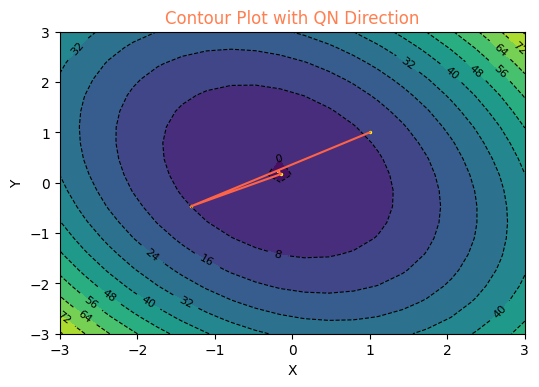

In [7]:
a = np.linspace(-3, 3, 20)
b = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(a,b)
z = lambda x, y: (4*x**2 + 2*x*y + 3*y**2 + x - y)

point_x = set_of_point[0]
point_y = set_of_point[1]

# 2D Contour Plot
cp = plt.contour(X, Y, z(X,Y), 10, colors = 'k', linestyles = 'dashed', linewidths = 0.8)
plt.clabel(cp, inline = 1, fontsize = 8)
cp = plt.contourf(X, Y, z(X,Y), 10)

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Contour Plot with QN Direction", c = 'coral')

# Plotting direction vectors
plt.plot(point_x, point_y, color = 'tomato')
plt.scatter(point_x, point_y, s = 2, c = 'yellow')
plt.gcf().set_dpi(100)
plt.show()